In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.graphics.api import qqplot

In [3]:
dta= sm.datasets.sunspots.load_pandas().data
dta.head(10)

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
5,1705.0,58.0
6,1706.0,29.0
7,1707.0,20.0
8,1708.0,10.0
9,1709.0,8.0


In [4]:
dta.describe()

,YEAR,SUNACTIVITY
count,309.000000,309.000000
mean,1854.000000,49.752104
std,89.344838,40.452595
min,1700.000000,0.000000
25%,1777.000000,16.000000
50%,1854.000000,40.000000
75%,1931.000000,69.800000
max,2008.000000,190.200000


In [5]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [6]:
dta

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [7]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

In [8]:
dta

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
...,...
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2
2007-12-31,7.5


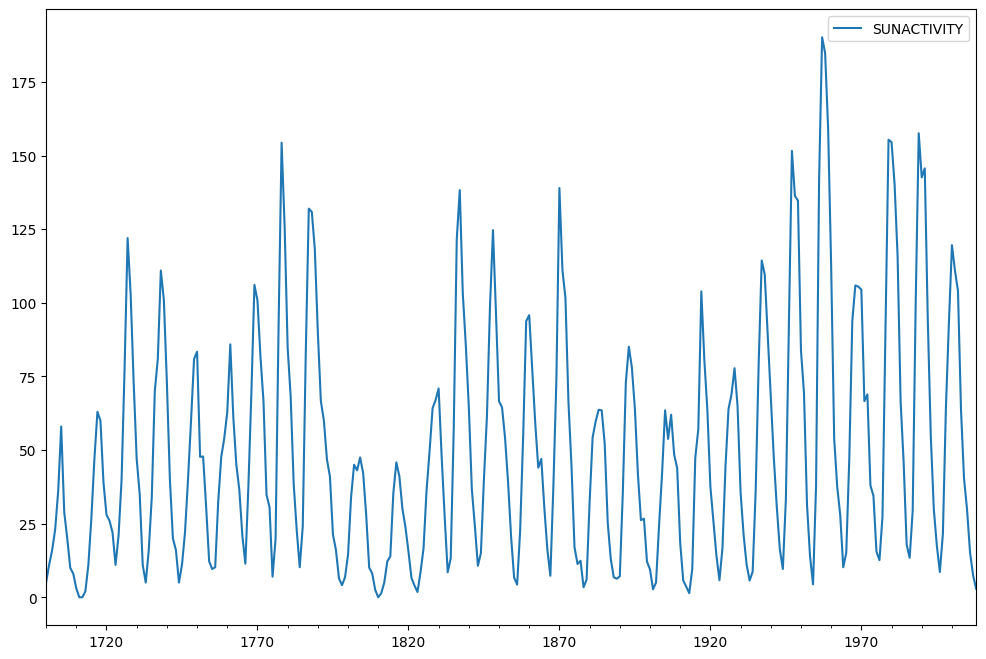

In [9]:

# show plots in the notebook
%matplotlib inline
dta.plot(figsize=(12,8));

In [10]:
sm.stats.durbin_watson(dta) ## to check autocorreation

array([0.13952893])

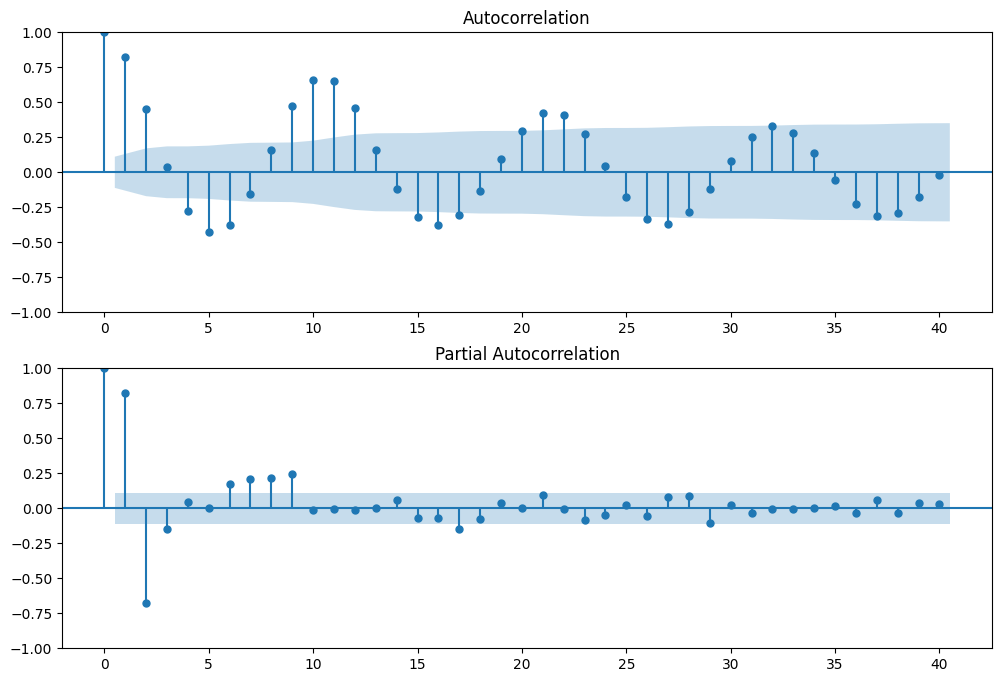

In [11]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [12]:
arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()
print(arma_mod20.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1307.319
Date:                Thu, 12 Oct 2023   AIC                           2622.637
Time:                        13:09:08   BIC                           2637.570
Sample:                    12-31-1700   HQIC                          2628.607
                         - 12-31-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7462      3.938     12.631      0.000      42.027      57.465
ar.L1          1.3906      0.037     37.694      0.000       1.318       1.463
ar.L2         -0.6886      0.036    -19.363      0.0

We now calculate the Akaike Information Criterion (AIC), Schwarz Bayesian Information Criterion (BIC), and Hannan-Quinn Information Criterion (HQIC). Our goalis to choose a model that minimizes (AIC, BIC, HQIC).

In [13]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.6370933008184 2637.570458408409 2628.6074811460644


Does our model obey the theory? We will use the Durbin-Watson test for autocorrelation. The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; a value toward 4 indicates negative autocorrelation.

In [14]:
sm.stats.durbin_watson(arma_mod20.resid.values)

2.1456895552178477

# Sarima

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                      SARIMAX Results                                       
Dep. Variable:                          SUNACTIVITY   No. Observations:                  309
Model:             SARIMAX(3, 0, 2)x(1, 1, [1], 12)   Log Likelihood               -1272.090
Date:                              Thu, 12 Oct 2023   AIC                           2560.180
Time:                                      13:09:37   BIC                           2589.730
Sample:                                  12-31-1700   HQIC                          2572.010
                                       - 12-31-2008                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7678      0.395      1.943      0.052      -0.007       1.542
ar.L2          0.16

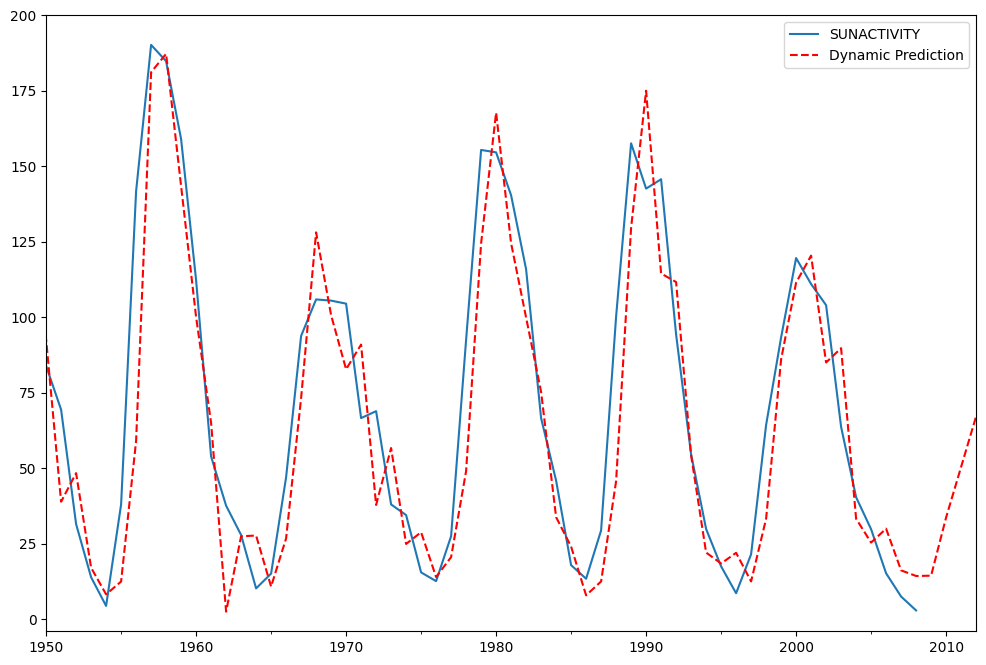

In [26]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the sunspots dataset
df = sm.datasets.sunspots.load_pandas().data

# Set the index to be a date range
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))

# Delete the "YEAR" column (it's not needed)
del df["YEAR"]

# Define the SARIMA model
sarima_model = SARIMAX(df.SUNACTIVITY, order=(3, 0, 2), seasonal_order=(1, 1, 1, 12))

# Fit the SARIMA model
sarima_results = sarima_model.fit()

# Print the summary of the SARIMA model
print(sarima_results.summary())

# Print AIC, BIC, and HQIC
print(sarima_results.aic, sarima_results.bic, sarima_results.hqic)

earliest_date = df.index.min()
# Make predictions with the SARIMA model
predict_sunspots = sarima_results.get_prediction(start=earliest_date, end='2012-01-01', dynamic=False)

# Plot the predictions
ax = df.loc['1950':].plot(figsize=(12, 8))
predict_sunspots.predicted_mean.plot(ax=ax, style='r--', label='Dynamic Prediction')
ax.legend()
ax.set_xlim(pd.to_datetime('1950-01-01'), pd.to_datetime('2012-01-01'))
ax.set_ylim(-4, 200)
plt.show()